In [7]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils


Numpy has several useful functions to perform filtering in the frequency domain:

np.fft.fft2: Compute the 2-dimensional discrete Fourier Transform
np.fft.ifft2: Compute the 2-dimensional inverse discrete Fourier Transform.
np.fft.fftshift: Shift the zero-frequency component to the center of the spectrum.
Implement a function that takes an grayscale image, and a kernel in the frequency domain, and applies the convolution theorem (seen in Equation 4 ). Try it out on a low-pass filter and a high-pass filter on the grayscale image ”camera man”(im = skimage.data.camera()).
The starter code provides a structure for plotting the intermidiate steps which you can use to verify that your implementation is working. The plots should include:

Original image
Amplitude of the image in frequency domain (|F{f}|
)
Amplitude of the filter in frequency domain
Amplitude of the filtered image in the frequency domain
Filtered image in the spatial domain
Make sure to shift the zero-frequency component to the center before displaying the amplitude. Implement this in the function convolve_im_freq() in freq_1.ipynb. The high-pass and low-pass filter is already defined in the starter code.

Reflection : You will observe a ”ringing” effect in the filtered image. What is the cause of this? The reflection is for your own learning so you dont need to provide it in the code bellow

In [14]:
def convolve_im_freq(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    # Compute frequency domain representation of the image
    fft_im = np.fft.fft2(im)
    # filter in frequency domain
    fft_filtered = fft_im * fft_kernel
    # Compute spatial domain representation of the filtered image
    #real part only because of numerical errors
    conv_result = np.fft.ifft2(fft_filtered).real
    
    
    
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        plt.title("Original Image")

        plt.subplot(1, 5, 2) 
        plt.imshow(np.fft.fftshift(np.log(np.abs(fft_im)+1)), cmap="gray")
        plt.title("FFT Image")
        
        plt.subplot(1, 5, 3)
        plt.imshow(np.fft.fftshift(np.log(np.abs(fft_kernel)+1)), cmap="gray")

        plt.title("FFT Kernel")
        plt.subplot(1, 5, 4)
        plt.imshow(np.fft.fftshift(np.log(np.abs(fft_filtered)+1)), cmap="gray")
        plt.title("Filtered FFT Image")
        plt.subplot(1, 5, 5) 
        # Visualize filtered spatial image
        plt.imshow(conv_result, cmap="gray")
        plt.title("Filtered Spatial Image")
        
        


    return conv_result

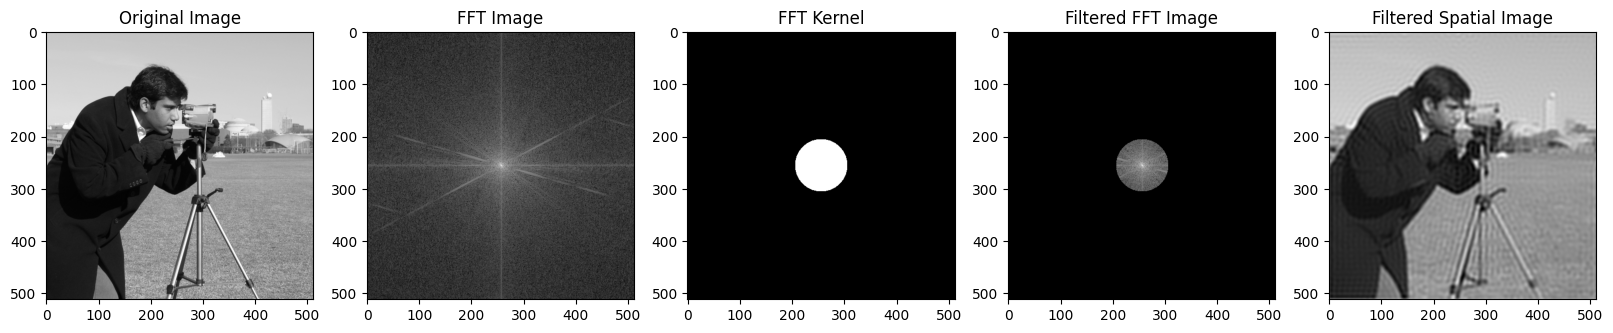

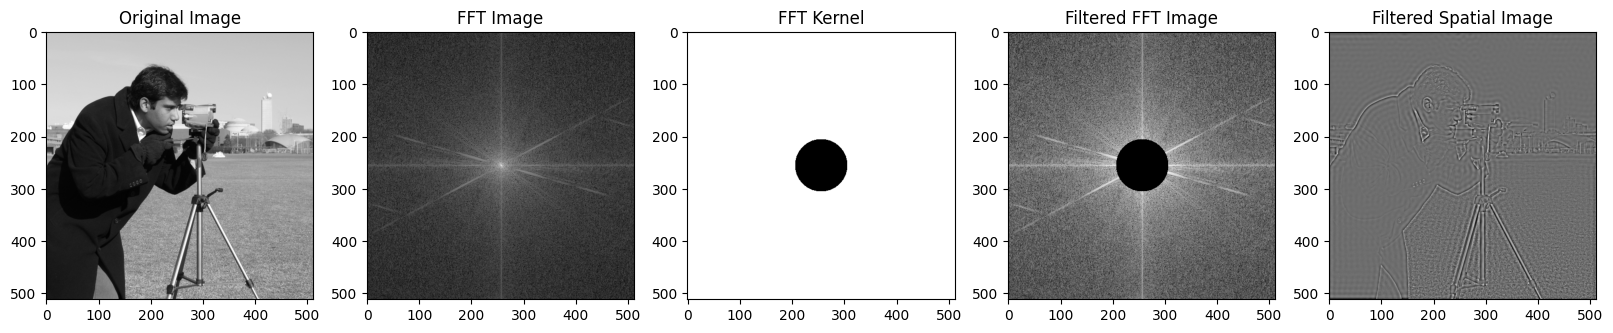

Saving image to: image_processed\camera_low_pass.png
Saving image to: image_processed\camera_high_pass.png


c:\Users\aditi\Documents\Uni\Visuell databeh\Assignment 5\utils.py:27: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")
c:\Users\aditi\Documents\Uni\Visuell databeh\Assignment 5\utils.py:27: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [15]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im_freq(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im_freq(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)